<a href="https://colab.research.google.com/github/M-Abbi/Financial-Modeling/blob/main/Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Models: A Simple Explanation
Decision tree models are a type of supervised learning algorithm used for both classification and regression tasks. They work by recursively partitioning the data into subsets based on the values of input features. This process creates a tree-like structure where:

- Each internal node represents a test on an attribute (e.g., "Is income > $50,000?").
- Each branch represents the outcome of that test.
- Each leaf node (terminal node) represents a class label (for classification) or a predicted value (for regression).
The goal is to create a tree that can predict the target variable by learning simple decision rules inferred from the data features.

**How it Works:**

1. Feature Selection: At each node, the algorithm selects the "best" feature to split the data. The "best" feature is typically the one that best separates the data points based on the target variable. This separation is often measured using metrics like Gini impurity or entropy (for classification) or variance reduction (for regression).

2. Splitting: Once the best feature and a split point are chosen, the data is divided into two or more subsets based on the values of that feature.

3. Recursion: This process of feature selection and splitting is repeated for each subset until a stopping criterion is met (e.g., a maximum depth of the tree is reached, or a node contains only data points of a single class).

4. Prediction: To predict the target variable for a new data point, we traverse the tree starting from the root node. At each internal node, we follow the branch corresponding to the value of the feature being tested. We continue this process until we reach a leaf node, whose value represents the prediction.

**Advantages of Decision Trees:**

- Easy to understand and interpret: The tree structure and decision rules are intuitive.
- Can handle both numerical and categorical data.
- Relatively little data preparation needed.
- Can capture non-linear relationships between features and the target variable.

**Disadvantages of Decision Trees:**

- Prone to overfitting: They can create complex trees that perform well on the training data but poorly on unseen data.
- Can be sensitive to small changes in the data.
- May not be the best choice for very complex problems.

# Toy Example in Python (Classification)
Imagine we're trying to guess the price of a house based on our knowledge of the real estate market. Our "input" would be the characteristics of the house (size, number of rooms, location), and our "output" would be your estimated price.

Mean Squared Error on the test set: 1450.00


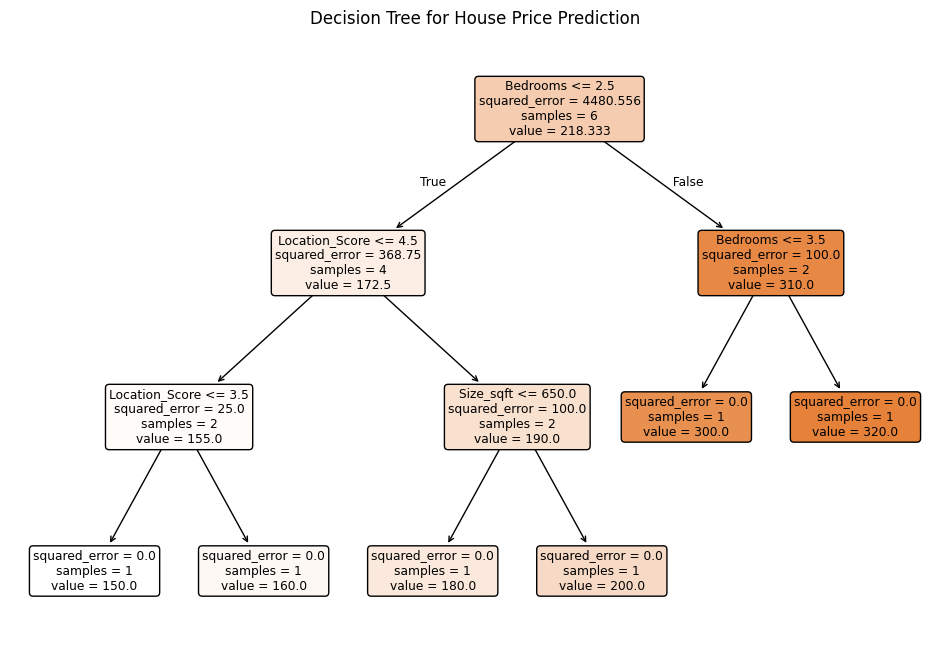


Predicted price for a 850 sqft, 2 bedroom house with location score 7: $200.00k


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Create a simple dataset for predicting house price
data = {'Size_sqft': [500, 750, 600, 900, 700, 800, 550, 950],
        'Bedrooms': [1, 2, 2, 3, 2, 3, 1, 4],
        'Location_Score': [3, 7, 5, 9, 6, 8, 4, 10], # Higher score means better location
        'Price_kUSD': [150, 220, 180, 300, 200, 250, 160, 320]}
df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df[['Size_sqft', 'Bedrooms', 'Location_Score']]
y = df['Price_kUSD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42, max_depth=3) # Limiting depth for simplicity

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse:.2f}")

# Visualize the decision tree (optional, requires graphviz for more complex trees)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for House Price Prediction")
plt.show()

# Example of making a prediction for a new house
new_house = pd.DataFrame({'Size_sqft': [850], 'Bedrooms': [2], 'Location_Score': [7]})
predicted_price = model.predict(new_house)
print(f"\nPredicted price for a 850 sqft, 2 bedroom house with location score 7: ${predicted_price[0]:.2f}k")